# The Pengest Munch, reviewed

We examine all reviews of them chicken shops, and try to make sense of the data.


---

## Quick glance

If we examine the reviews, you would notice some shops were not given any _"Overall"_ rating.

This is great! We can try to predict the _"Overall"_ rating for these shops then, given the rest of information known.

In [5]:
# Read data source

import pandas as pd

filepath = "reviews.csv"
reviews = pd.read_csv(filepath, parse_dates=True)

# preview
cols_to_preview = [
    "Shop Name",
    "Fries",
    "Wings",
    "Burger",
    "Overall",
]
up_to = 20
print(
    reviews[cols_to_preview].head(up_to)
)

                          Shop Name  Fries  Wings  Burger  Overall
0                 Taste of Tennesse    1.5   4.25     3.0      NaN
1                    Eden’s Cottage    4.0   5.00     4.5      4.0
2                              Dixy    2.0   2.00     3.0      2.0
3                            Dallas    4.0   4.30     4.6      4.5
4                    Chicken Valley    2.9   1.90     1.2      1.5
5                        Chick King    3.0   3.50     3.5      3.5
6                     Sam’s Chicken    3.0   4.00     3.8      4.3
7               Miami Fried Chicken    4.2   4.30     4.4      4.2
8                          Morley’s    4.1   4.50     4.2      4.3
9                               FFC    2.4   2.00     1.5      2.0
10  Chicken Valley @ Sheperd’s Bush    3.2   2.30     1.7      1.7
11                             KRFC    3.2   4.60     3.3      3.2
12                      Chicken Run    4.6   1.70     3.0      3.6
13                           Texas     4.2   3.90     4.5     

## Massaging Data

At this point, many of the columns' values are read as-is (as strings).

Let's try to transform their data types appropriately!

In [6]:
# Massage data source

import decimal

from geojson import Point


# convert ratings to numeric values.
rating_columns = ["Fries", "Wings", "Burger", "Overall"]

for col in rating_columns:
    reviews[col] = pd.to_numeric(reviews[col])

# Convert Geolocation to GeoJSON Point
def to_geojson(df):
    long, lat = map(lambda xy: float(xy), df["Geolocation"].split(",")[:2])
    return Point((long, lat))
    

reviews["Geolocation"] = reviews.apply(to_geojson, axis=1)

print(reviews.head(5))

   Episode          Shop Name  \
0        1  Taste of Tennesse   
1        2     Eden’s Cottage   
2        3               Dixy   
3        4             Dallas   
4        5     Chicken Valley   

                                         Geolocation Reviewed at  Fries  \
0  {'type': 'Point', 'coordinates': [51.527216, -...  2015/09/16    1.5   
1  {'type': 'Point', 'coordinates': [51.564367, -...  2015/11/12    4.0   
2  {'type': 'Point', 'coordinates': [51.557023, -...  2015/11/30    2.0   
3  {'type': 'Point', 'coordinates': [51.503663, -...  2015/12/30    4.0   
4  {'type': 'Point', 'coordinates': [51.520947, -...  2016/09/24    2.9   

   Wings  Burger  Overall  
0   4.25     3.0      NaN  
1   5.00     4.5      4.0  
2   2.00     3.0      2.0  
3   4.30     4.6      4.5  
4   1.90     1.2      1.5  


## Exploring Features

Okay, while collated the reviews, I could't help but feel that Man always be critical of them wings.

As such, I wonder if there is a correlation between the ratings of a shop's wings to their overall score.

Gotta munch on these as appetisers!

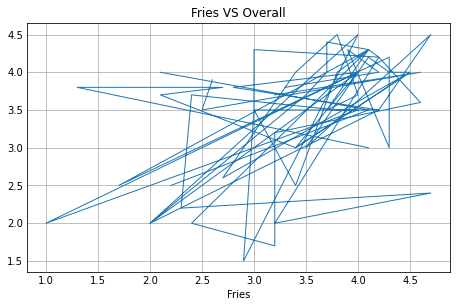

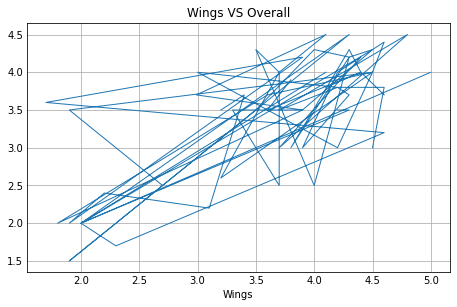

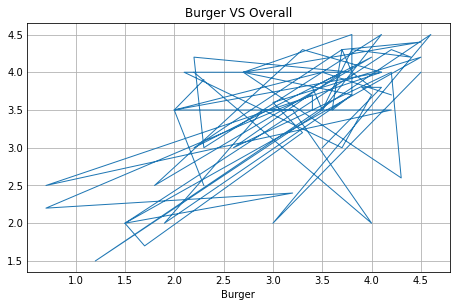

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

y = reviews["Overall"]
features = ["Fries", "Wings", "Burger",]

for feature in features:
    x = reviews[feature]
    _fig, ax = plt.subplots()
    ax.plot(x, y, linewidth=1.0)
    ax.set_title(f"{feature} VS Overall")
    ax.set_xlabel(feature)
    plt.show()

Interesting!

We can say that all 3 features enjoy a somewhat linear relationship with the Overall score.

I think it is fair (and perhaps "obvious") that Fries, Wings and Burger raring affected the Overall score given.

However, from these graphs, it does appear that Fries is not the most reliable predictor of Overall Score, given the scatter.
It looks less closer to a straight line than the other 2 features.

Also, _surprise, surprise_, I think Wings VS Overall is the closest to a linear relationship;

We can probably use Wings (and Burger) to try to predict the Overall score.